### Library import

In [1]:
import sys
import os
import serial
import csv
import time
import pandas as pd
import functools
import numpy as np
import random as rd
import matplotlib
import threading


import matplotlib.pyplot as plt
import numpy as np

from matplotlib.pyplot import figure

plt.rcParams["figure.figsize"] = (20,3)

In [ ]:
import data_read

In [ ]:
from PyQt5.QtWidgets import *
from PyQt5.QtCore import *
from PyQt5.QtGui import *

matplotlib.use("Qt5Agg")
from matplotlib.figure import Figure
from matplotlib.animation import TimedAnimation
from matplotlib.lines import Line2D
from matplotlib.backends.backend_qt5agg import FigureCanvasQTAgg as FigureCanvas

### Data capture using serial port

- 1 sensor data capture

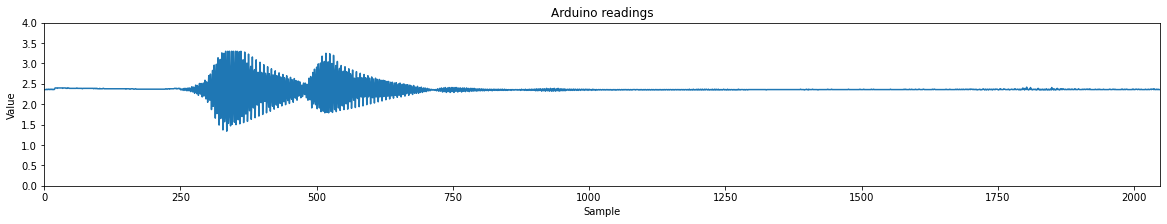

In [60]:
ser = serial.Serial('/dev/ttyACM1', baudrate=115200)
ser.flushInput()
result = [] # Array to store readed values
n = 2048 # Number of values to read. Each arduino read is 2048bytes.
for i in range(n):
    line = ser.readline() # Read serial port input
    if line:
        string = line.decode() # Decode values
        result.append(string.split('\r')[0]) # Split and save only the valuable data

        with open("captured_data/test_near.csv", "a") as f: # Save data to local file
            writer = csv.writer(f, delimiter=',')
            writer.writerow([string])
            
ser.close()

df = pd.DataFrame(result)            
df = df.replace('\r\n', '', regex = True)
df.drop(df[(df[0].astype(str).str.len() != 3) & (df[0].astype(str).str.len() != 4)].index, inplace=True)

x = df[0].astype(float)
y = np.arange(0, len(x))

plt.plot(y, x)
plt.title('Arduino readings')
plt.ylim([0, 4])
plt.xlim([0,2048])
plt.xlabel('Sample')
plt.ylabel('Value')
plt.show()

- Multiple sensors data capture

In [66]:
### Define constants
samples_to_capture = 1
serial_length = 2048  # Length of the serial comm message
n_sensors = 3  #  Number of sensors

### Initiate serial port communications
ser = serial.Serial('/dev/ttyACM0', baudrate=115200)
ser.flushInput()

### Clear data tensor
received_data = np.zeros([samples_to_capture,  # Define tensor to store captured data
                          n_sensors,
                          serial_length])

for i in range(samples_to_capture):
    for j in range(n_sensors):
        temp_data = []  # To store temporal data

        for k in range(serial_length):
            line = ser.readline()  # Read serial port input data
            if line:
                string = line.decode() # Decode serial data
                temp_data.append(string.split('\r')[0])  # Save data to temporal storage
        
        temp_data = [2.5 if (len(data)!=4) else data for data in temp_data]
        received_data[i, j, :] = temp_data  # Move data from temporal storage to the tensor
    file_name = "captured_data/multisensor_data/sample"+str(i)+".csv"
    pd.DataFrame(received_data[i, :, :]).to_csv(file_name, index = False)
ser.close()

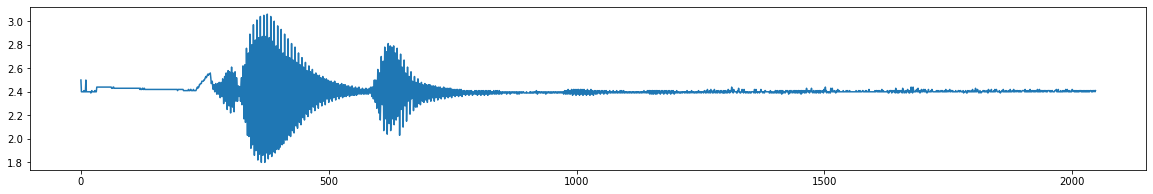

In [75]:
### Plot a sample
sample = received_data[0][0]
plt.plot(np.arange(0, len(sample)), sample, label = 'Initial function')  # Plot the derivate function

### Data reading from storage file

In [ ]:
df = pd.read_csv('captured_data/test.csv', header=None, dtype={'Voltages': float}) #read csv file
df = df.replace('\r\n', '', regex = True)
df.drop(df[df[0].str.len() != 4].index, inplace=True)
#df.drop(df[df[0] == ''].index, inplace=True)

x = df[0].to_numpy().astype(float)
y = np.arange(0, len(x))

plt.plot(y, x)
plt.title('Arduino readings')
plt.ylim([0, 4])
plt.xlim([0,2048])
plt.xlabel('Sample')
plt.ylabel('Value')
plt.show()

### Real Time Data reading and plot via Serial Port

In [ ]:
app = QApplication(sys.argv)
QApplication.setStyle(QStyleFactory.create('Plastique'))
myGUI = data_read.CustomMainWindow()
sys.exit(app.exec_())